In [1]:
# vector manipulation
import numpy as np
# math functions
import math 
# for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import axes3d

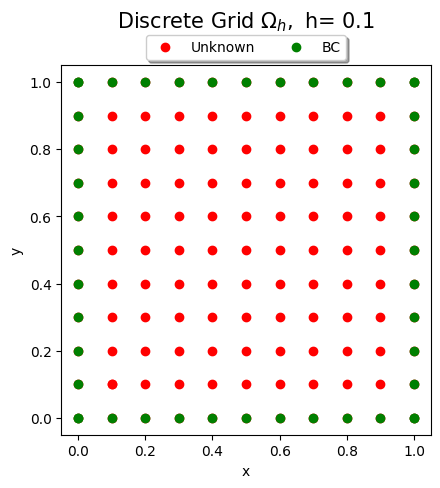

In [28]:
N=10
h=1/N
x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
plt.plot(x[1],y[1],'ro',label='Unknown')
plt.plot(X,Y,'ro')
plt.plot(np.ones(N+1),y,'go',label='BC')
plt.plot(np.zeros(N+1),y,'go')
plt.plot(x,np.zeros(N+1),'go')
plt.plot(x, np.ones(N+1),'go')
#plt.xlim((-0.1,1.1))
#plt.ylim((-0.1,1.1))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
plt.title(r'Discrete Grid $\Omega_h,$ h= %s'%(h),fontsize=15,y=1.08)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


2D heat equation solver
Done!


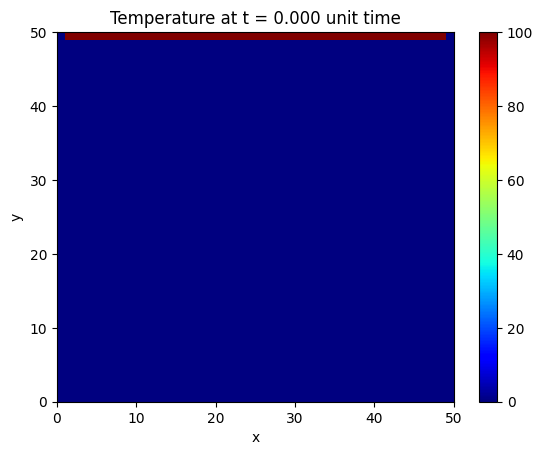

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("2D heat equation solver")

plate_length = 50
max_iter_time = 750

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        u[k+1, 1:-1, 1:-1] = u[k,1:-1, 1:-1] + gamma*(u[k, 2:, 1:-1] - 2*u[k,1:-1, 1:-1] + u[k,:-2, 1:-1] + u[k,1:-1, 2:] - 2*u[k,1:-1, 1:-1] + u[k,1:-1, :-2])
    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

print("Done!")

MovieWriter ffmpeg unavailable; using Pillow instead.


Done!


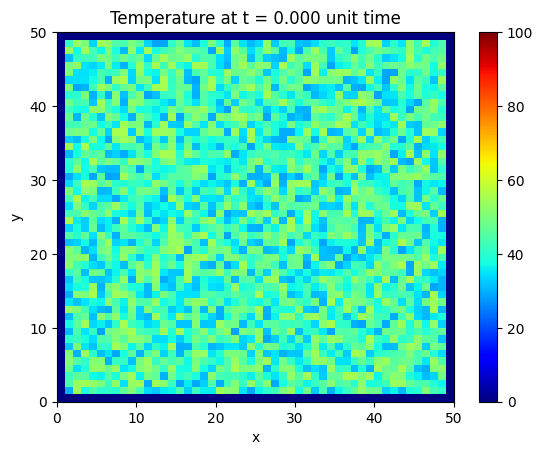

In [48]:
# Change boundary conditions
u_top = 0.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Change u_initial (random temperature between 28.5 and 55.5 degree)
#u_initial = 0
u_initial = np.random.uniform(low=28.5, high=55.5, size=(plate_length,plate_length))

# Change initial conditions
#u.fill(u_initial)
u[0,:,:] = u_initial

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right
max_iter_time = 400


def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        u[k+1, 1:-1, 1:-1] = u[k,1:-1, 1:-1] + gamma*(u[k, 2:, 1:-1] - 2*u[k,1:-1, 1:-1] + u[k,:-2, 1:-1] + u[k,1:-1, 2:] - 2*u[k,1:-1, 1:-1] + u[k,1:-1, :-2])
    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

print("Done!")